# LABORATORIO 02 Regresion logistica
Diego Roberto Arancibia Delgado
https://github.com/drArancibiaDelgado/sis420-/tree/main/Laboratorios/Lab%202

In [163]:
# from google.colab import drive
# drive.mount('/content/drive')

In [164]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

from sklearn.model_selection import train_test_split
import tabulate



# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

##  Regresion Logistica



In [165]:
# Cargar datos
data = pd.read_csv("Covid Data.csv")
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [167]:
#aqui se dropeo las columnas que no se utilizaran, dado a que tienen valores que volvia el modelo inestable
data = data.drop(['DATE_DIED', 'SEX', 'PATIENT_TYPE'], axis=1)
data

,USMER,MEDICAL_UNIT,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,13,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97


In [168]:
# Convierte los valores 97, 98, 99 en una lista, son datos que no existen
valores_a_eliminar = [97, 98, 99, np.nan]

# Verifica las filas que cumplen con la condición en cualquier columna
condicion_eliminar = data.isin(valores_a_eliminar).any(axis=1)

# Elimina las filas que cumplen con la condición
data = data[~condicion_eliminar]

len(data)

76749

In [169]:
#aqui tratamos los valores para convertirlos en binarios
data.loc[:, 'OBESITY'] = data['OBESITY'].map({1: 0, 2: 1}).fillna(-1).astype(int)
data.loc[:, 'USMER'] = data['USMER'].map({1: 0, 2: 1}).fillna(-1).astype(int)
data.loc[:, 'INTUBED'] = data['INTUBED'].map({1: 0, 2: 1}).fillna(-1).astype(int)
data.loc[:, 'PNEUMONIA'] = data['PNEUMONIA'].map({1: 0, 2: 1}).fillna(-1).astype(int)
data.loc[:, 'PREGNANT'] = data['PREGNANT'].map({1: 0, 2: 1}).fillna(-1).astype(int)
data.loc[:, 'DIABETES'] = data['DIABETES'].map({1: 0, 2: 1}).fillna(-1).astype(int)
data.loc[:, 'ASTHMA'] = data['ASTHMA'].map({1: 0, 2: 1}).fillna(-1).astype(int)
data.loc[:, 'INMSUPR'] = data['INMSUPR'].map({1: 0, 2: 1}).fillna(-1).astype(int)
data.loc[:, 'HIPERTENSION'] = data['HIPERTENSION'].map({1: 0, 2: 1}).fillna(-1).astype(int)
data.loc[:, 'OTHER_DISEASE'] = data['OTHER_DISEASE'].map({1: 0, 2: 1}).fillna(-1).astype(int)
data.loc[:, 'CARDIOVASCULAR'] = data['CARDIOVASCULAR'].map({1: 0, 2: 1}).fillna(-1).astype(int)
data.loc[:, 'RENAL_CHRONIC'] = data['RENAL_CHRONIC'].map({1: 0, 2: 1}).fillna(-1).astype(int)
data.loc[:, 'TOBACCO'] = data['TOBACCO'].map({1: 0, 2: 1}).fillna(-1).astype(int)
data.loc[:, 'ICU'] = data['ICU'].map({1: 0, 2: 1}).fillna(-1).astype(int)
data.loc[:, 'COPD'] = data['COPD'].map({1: 0, 2: 1}).fillna(-1).astype(int)



In [170]:
#informacion de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76749 entries, 5 to 1048569
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   USMER                 76749 non-null  int64
 1   MEDICAL_UNIT          76749 non-null  int64
 2   INTUBED               76749 non-null  int64
 3   PNEUMONIA             76749 non-null  int64
 4   AGE                   76749 non-null  int64
 5   PREGNANT              76749 non-null  int64
 6   DIABETES              76749 non-null  int64
 7   COPD                  76749 non-null  int64
 8   ASTHMA                76749 non-null  int64
 9   INMSUPR               76749 non-null  int64
 10  HIPERTENSION          76749 non-null  int64
 11  OTHER_DISEASE         76749 non-null  int64
 12  CARDIOVASCULAR        76749 non-null  int64
 13  OBESITY               76749 non-null  int64
 14  RENAL_CHRONIC         76749 non-null  int64
 15  TOBACCO               76749 non-null  int64
 16  CLASIFF

In [171]:
data


,USMER,MEDICAL_UNIT,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
5,1,1,1,0,40,1,1,1,1,1,1,1,1,1,1,1,3,1
8,1,1,1,1,37,1,0,1,1,1,0,1,1,0,1,1,3,1
9,1,1,1,1,25,1,1,1,1,1,1,1,1,1,1,1,3,1
16,1,1,1,0,80,1,1,1,1,1,0,1,1,1,1,1,3,0
56,1,1,0,0,58,1,1,1,1,1,0,1,0,0,1,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048535,0,13,1,1,79,1,1,1,1,1,0,1,1,1,1,1,7,1
1048553,1,13,1,0,61,1,0,1,1,1,0,1,1,1,1,1,7,1
1048554,1,13,1,0,63,1,1,1,0,1,1,1,1,0,1,1,7,1
1048567,0,13,1,1,23,1,0,1,1,1,1,1,1,0,1,1,7,1


In [172]:
#separacion de datos
# Se separa el conjunto de datos en dos subconjuntos: entrenamiento y prueba
train_dataset, test_dataset = train_test_split(data, test_size=0.2, random_state=42)

X_test = test_dataset.drop(['OBESITY'], axis=1).values
y_test = test_dataset['OBESITY'].values

X_train = train_dataset.drop(['OBESITY'], axis=1).values
y_train = train_dataset['OBESITY'].values

In [173]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


<a id="section1"></a>
###  Implementacion

#### Fución Sigmoidea



In [174]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))
    
    return g

Calculando la sigmoide

In [175]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [176]:
# Agrega una columna de unos a X. La función agrega una columna de unos al principio de la matriz X
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [177]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)

# print(X_norm)
print('{:>8s}{:>8s}{:>10s}{:>15s}{:>8s}{:>10s}{:>8s}{:>8s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'y'))
print('-'*200)
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:15.3f}{:15.3f}{:15.3f}{:15.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:15.3f}{:15.3f}{:15.3f}{:15.3f}{:8.3f}{:8.3f}{:8.3f}'.format(X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], 
                                                                                 X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11], X_norm[i, 12], X_norm[i, 13], 
                                                                                 X_norm[i, 14], X_norm[i, 15], X_norm[i, 16], 
                                                                                 y_train[i]))

  X[:,0] X[:, 1]   X[:, 2]        X[:, 3] X[:, 4]   X[:, 5] X[:, 6]       y
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  -0.907   1.282     0.422         -0.874          0.505          0.154          0.681   0.228   0.191   0.209     0.765          0.266          0.233          0.261          0.214  -0.872   0.292   1.000
   1.102  -0.890     0.422          1.144          0.357          0.154          0.681   0.228   0.191   0.209     0.765         -3.753          0.233          0.261          0.214   1.213   0.292   1.000
  -0.907  -0.890    -2.368          1.144          0.901          0.154         -1.467   0.228   0.191   0.209    -1.307          0.266          0.233          0.261          0.214  -0.872   0.292   1.000
   1.102  -0.890     0.422          1.144         -1.471          0.154         -1.467   0.228   0.191   0.2

<a id="section2"></a>
#### Función de Costo y Gradiente



In [178]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m_train, n_train = X_train.shape
# Agraga el termino de intercepción a A
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X_ready)

[[ 1.         -0.90740821  1.28202903 ...  0.21372113 -0.87200051
   0.29161138]
 [ 1.          1.10203984 -0.88955484 ...  0.21372113  1.21303095
   0.29161138]
 [ 1.         -0.90740821 -0.88955484 ...  0.21372113 -0.87200051
   0.29161138]
 ...
 [ 1.         -0.90740821  1.28202903 ...  0.21372113 -0.87200051
  -3.4292214 ]
 [ 1.         -0.90740821 -1.16100282 ...  0.21372113 -0.87200051
   0.29161138]
 [ 1.          1.10203984 -0.88955484 ...  0.21372113 -0.87200051
   0.29161138]]


In [179]:
def calcularCosto(theta, X, y, lambda_):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    return J

In [180]:
def descensoGradiente(theta, X, y, alpha, num_iters, lambda_):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        
        gradiente = (1 / m) * (h - y).dot(X)
        regurizacion = (lambda_ / m) * theta[1:]
        
        theta[0] -= alpha * gradiente[0]
        theta[1:] -= alpha * gradiente[1:] + regurizacion
        
        # theta[1:] = theta[1:] - (alpha / m) * (h - y).dot(X[:, 1:]) + (lambda_ / m) * theta[1:]
        # theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y, lambda_))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 1.22956782e+00 -4.87541088e-03 -2.56620970e-03  9.50832309e-03
  1.61110185e-02 -1.24567824e-02 -7.31384545e-03  2.24108866e-02
  8.00385019e-03  1.14263779e-02 -5.46834075e-04  3.22744102e-02
  6.36625565e-04  1.36053088e-02 -1.73752163e-03  1.49912615e-02
  1.85257068e-02  5.69157228e-03]


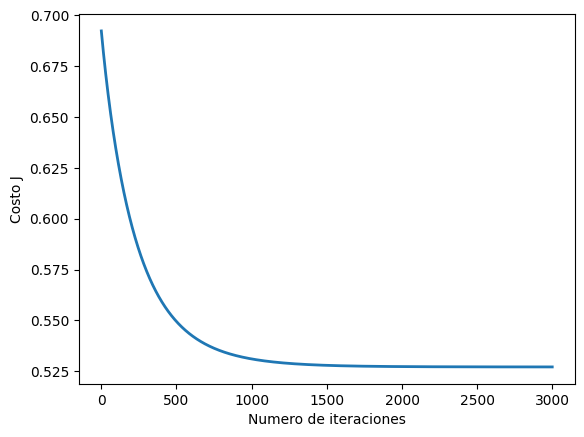

In [181]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.009

num_iters = 3000
lambda_ = 1000
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(len(X_ready[0]))

theta, J_history = descensoGradiente(theta, X_ready, y_train, alpha, num_iters, lambda_)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# X_array = [1, 1, 80, 66, 28, 0, 33.4, 0.675, 46]
# aprueba = sigmoid(np.dot(X_array, theta))  

Validaciones

In [182]:
X_test = (X_test - mu) / sigma
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

y_pred = []
for i in range(len(X_test)):
    y_pred.append(sigmoid(np.dot(X_test[i], theta.T)))
    
y_pred = np.array(y_pred)

y_umbral = (y_pred >= 0.5).astype(int)

print("la precision del modelo es: ", np.mean(y_umbral == y_test) * 100)


la precision del modelo es:  77.65472312703582
